### Two-point correlation functions for shear and convergence in DC2

In this notebook, we compute two-point correlation functions for shear and convergence using a catalog of DC2 galaxies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import treecorr
import pyccl

### Load data

We load the full DC2 catalog and then create a random subset of one million galaxies 
to reduce the computational demand of the calculations below.

In [2]:
# This cell takes 3-5 minutes
catalog = pd.read_csv("/data/scratch/shreyasc/cosmo_only.csv")

In [3]:
# This cell takes 5-10 seconds
catalog_subset = catalog.sample(n = 10000000)

### Empirical two-point functions using the `treecorr` package

In [4]:
cat = treecorr.Catalog(ra = catalog_subset["ra"], dec = catalog_subset["dec"], ra_units = "deg", dec_units = "deg",
                       g1 = catalog_subset["shear_1"], g2 = catalog_subset["shear_2"], k = catalog_subset["convergence"])

#### Shear

In [5]:
# This cell takes less than a minute
gg = treecorr.GGCorrelation(min_sep = 1, max_sep = 400, nbins = 100, sep_units = 'arcmin')
gg.process(cat)

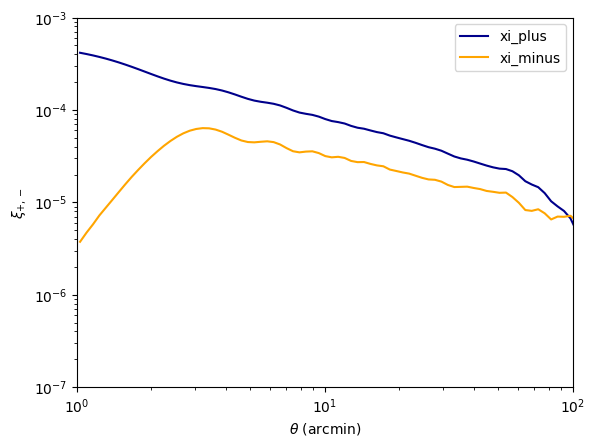

In [6]:
r = np.exp(gg.meanlogr)
xip = gg.xip
xim = gg.xim

_ = plt.plot(r, xip, color = 'darkblue', label = "xi_plus")
_ = plt.plot(r, xim, color = 'orange', label = "xi_minus")
_ = plt.legend()

_ = plt.xscale('log')
_ = plt.yscale('log')

_ = plt.xlabel(r'$\theta$ (arcmin)')
_ = plt.ylabel(r'$\xi_{+,-}$')

_ = plt.xlim([1,100])
_ = plt.ylim([1e-7,1e-3])

#### Convergence

In [7]:
# This cell takes less than a minute
kk = treecorr.KKCorrelation(min_sep = 1, max_sep = 400, nbins = 100, sep_units = 'arcmin')
kk.process(cat)

We confirm that the two-point correlation function of the convergence is identical to $\xi_+$ for shear as the number of galaxies in the sample $\rightarrow \infty$. The discrepancy for larger $\theta$ in the plot below is due to the fact that we are using a finite sample.

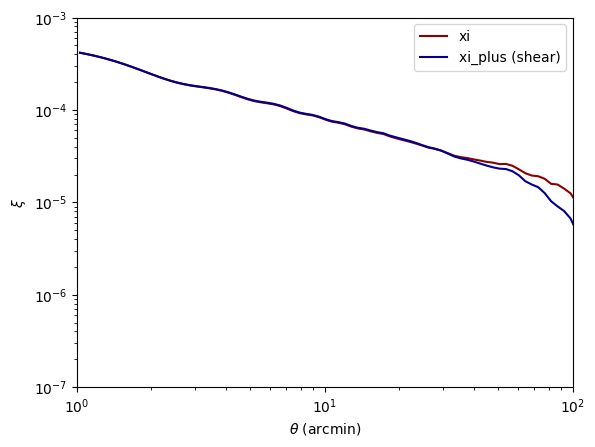

In [8]:
r = np.exp(kk.meanlogr)
xi = kk.xi

_ = plt.plot(r, xi, color = 'darkred', label = "xi")
_ = plt.plot(r, xip, color = 'darkblue', label = "xi_plus (shear)")
_ = plt.legend()

_ = plt.xscale('log')
_ = plt.yscale('log')

_ = plt.xlabel(r'$\theta$ (arcmin)')
_ = plt.ylabel(r'$\xi$')

_ = plt.xlim([1,100])
_ = plt.ylim([1e-7,1e-3])

### Theoretical two-point functions using `pyccl`

...